In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from utils import *
import os

In [5]:
img_path = 'Images'
img_name = 'GSR'
img_suffix = '.jpeg'
os.makedirs('result/' + img_name, exist_ok=True)

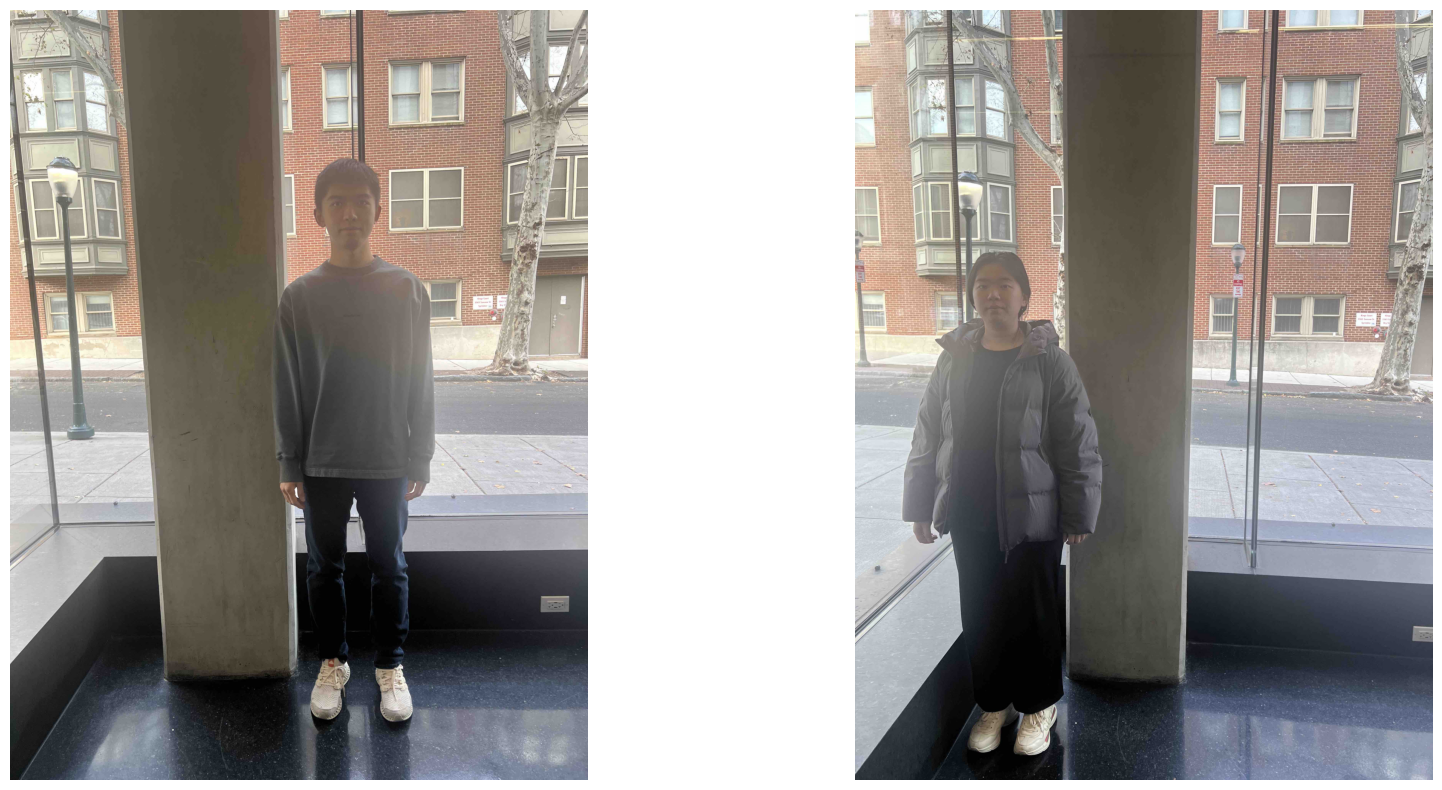

In [6]:
img1 = cv2.imread(img_path + '/' + img_name + '_1' + img_suffix)
img2 = cv2.imread(img_path + '/' + img_name + '_2' + img_suffix)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
_, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img1)
axs[0].set_axis_off()
axs[1].imshow(img2)
axs[1].set_axis_off()
plt.show()

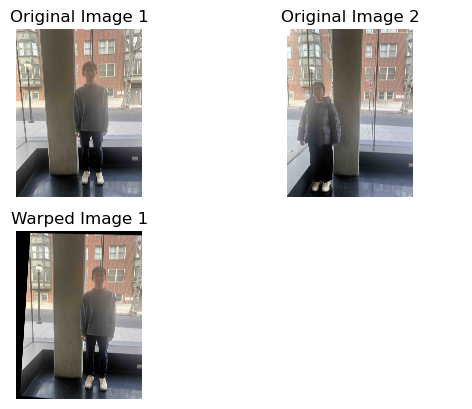

In [7]:
H = findHomography(img1, img2, showMatches=True, filePath='result/' + img_name)
_, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img1)
axs[0, 0].set_axis_off()
axs[0, 0].set_title("Original Image 1")
axs[0, 1].imshow(img2)
axs[0, 1].set_axis_off()
axs[0, 1].set_title("Original Image 2")
axs[1, 0].imshow(cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0])))
axs[1, 0].set_axis_off()
axs[1, 0].set_title("Warped Image 1")
plt.axis('off')
plt.savefig(f'result/{img_name}/homography.jpg')

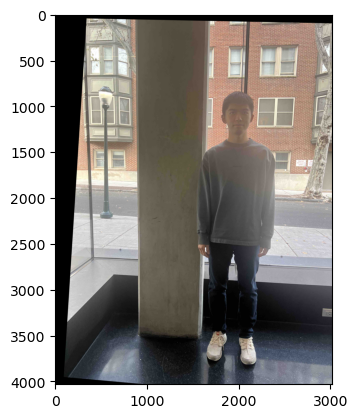

In [8]:
warped_img1 = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
cv2.imwrite(f'result/{img_name}/warped_img1.jpg', cv2.cvtColor(warped_img1, cv2.COLOR_RGB2BGR))
plt.imshow(warped_img1)
plt.axis('off')

In [10]:
bbox = findBoundingBox(warped_img1)
masks, bbox = findMask(warped_img1)
np.save('tmp/mask.npy', masks[0])
np.save('tmp/bbox.npy', bbox)
plt.figure(figsize=(10, 10))
plt.imshow(warped_img1)
plt_mask(masks[0], plt.gca())
plt_bbox(bbox, plt.gca())
plt.savefig(f'result/{img_name}/bbox&mask.jpg')
plt.show()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1 but got size 0 for tensor number 1 in the list.

In [ ]:
new_img = maskTransfer(warped_img1, img2, mask, bbox)   